In [137]:
!pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.3/70.9 MB 5.3 MB/s eta 0:00:14
                                              0.5/70.9 MB 5.5 MB/s eta 0:00:13
                                              0.6/70.9 MB 4.8 MB/s eta 0:00:15
                                              0.7/70.9 MB 3.9 MB/s eta 0:00:18
                                              0.9/70.9 MB 3.6 MB/s eta 0:00:20
                                              1.0/70.9 MB 3.4 MB/s eta 0:00:21
                                              1.1/70.9 MB 3.2 MB/s eta 0:00:22
                                              1.2/70.9 MB 3.2 MB/s eta 0:00:22
                                              1.3/70.9 MB 3.2 MB/s eta 0:00:22
                                              1.4/70.9 MB 3.0 MB/s eta 0:00:23
                                              1.5/70.9 MB 3.1 MB/s eta 0:00:23
                                              1.5/70.9 MB 3

In [138]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [81]:
df=pd.read_csv("car_price.csv")

In [82]:
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [83]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [84]:
df.shape

(205, 26)

In [85]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [86]:
df.tail()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [87]:
df.duplicated().sum()

0

In [88]:
df.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


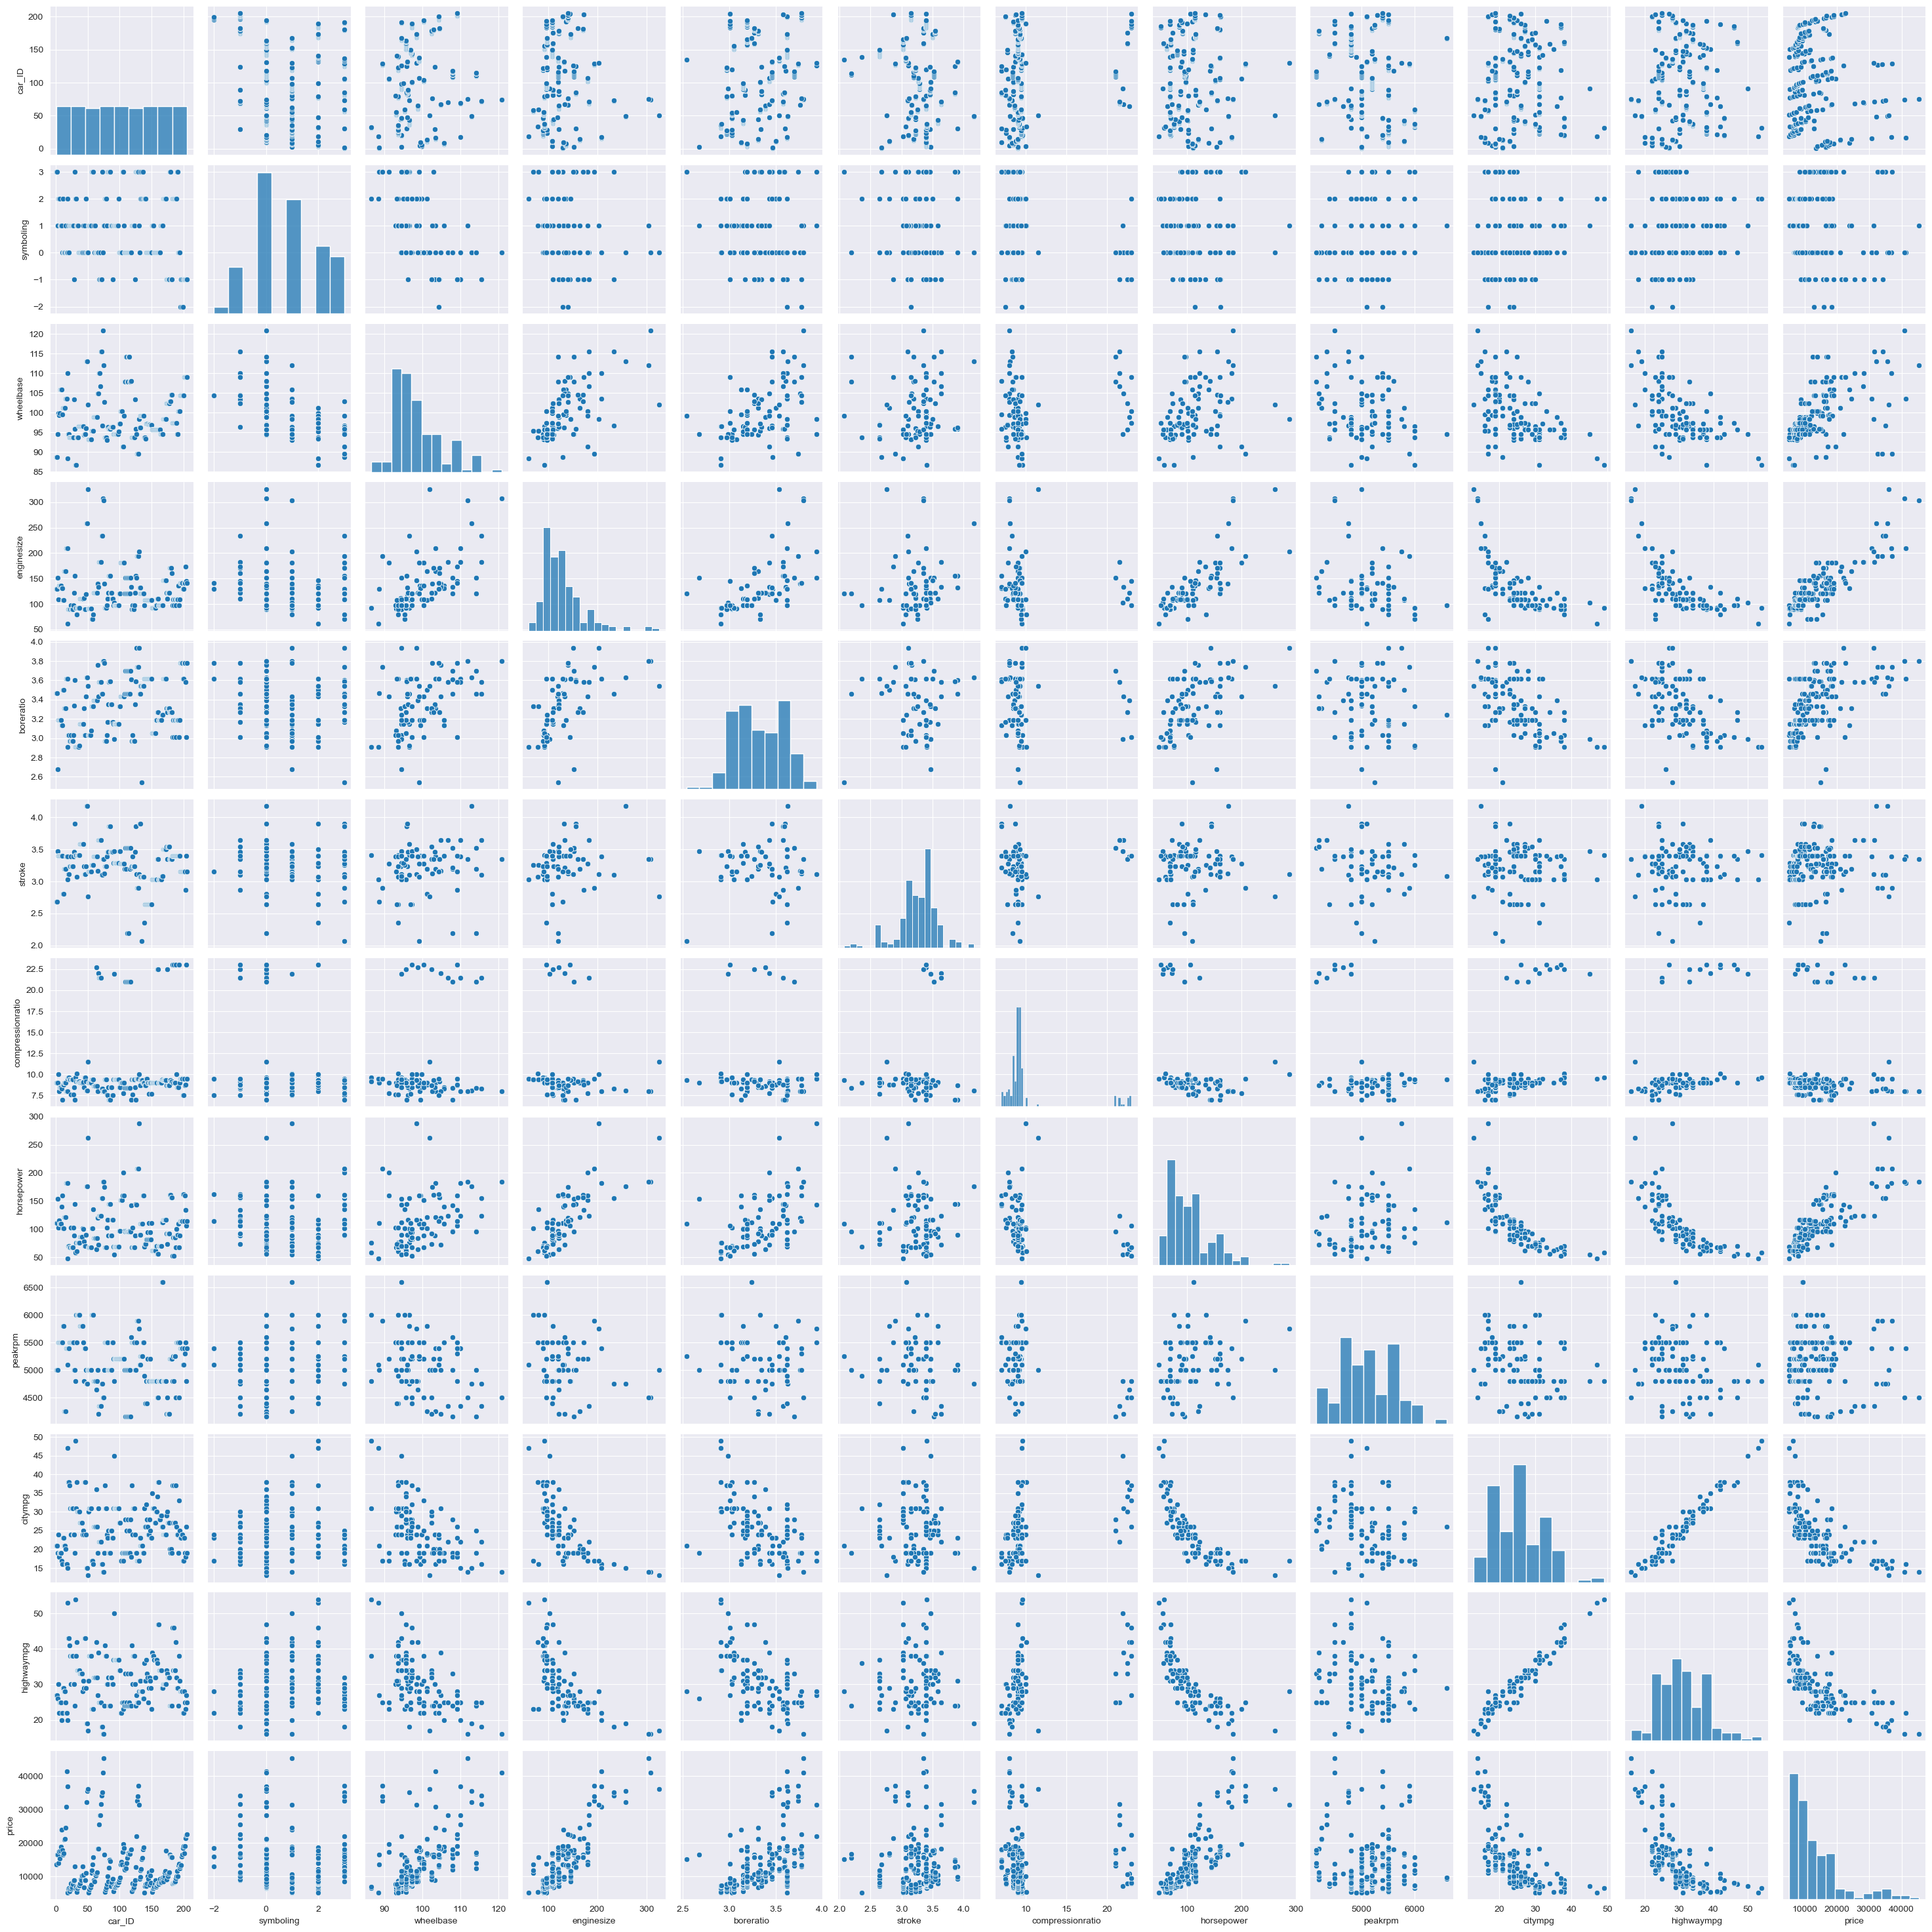

In [89]:
sns.pairplot(df[['car_ID','symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']])


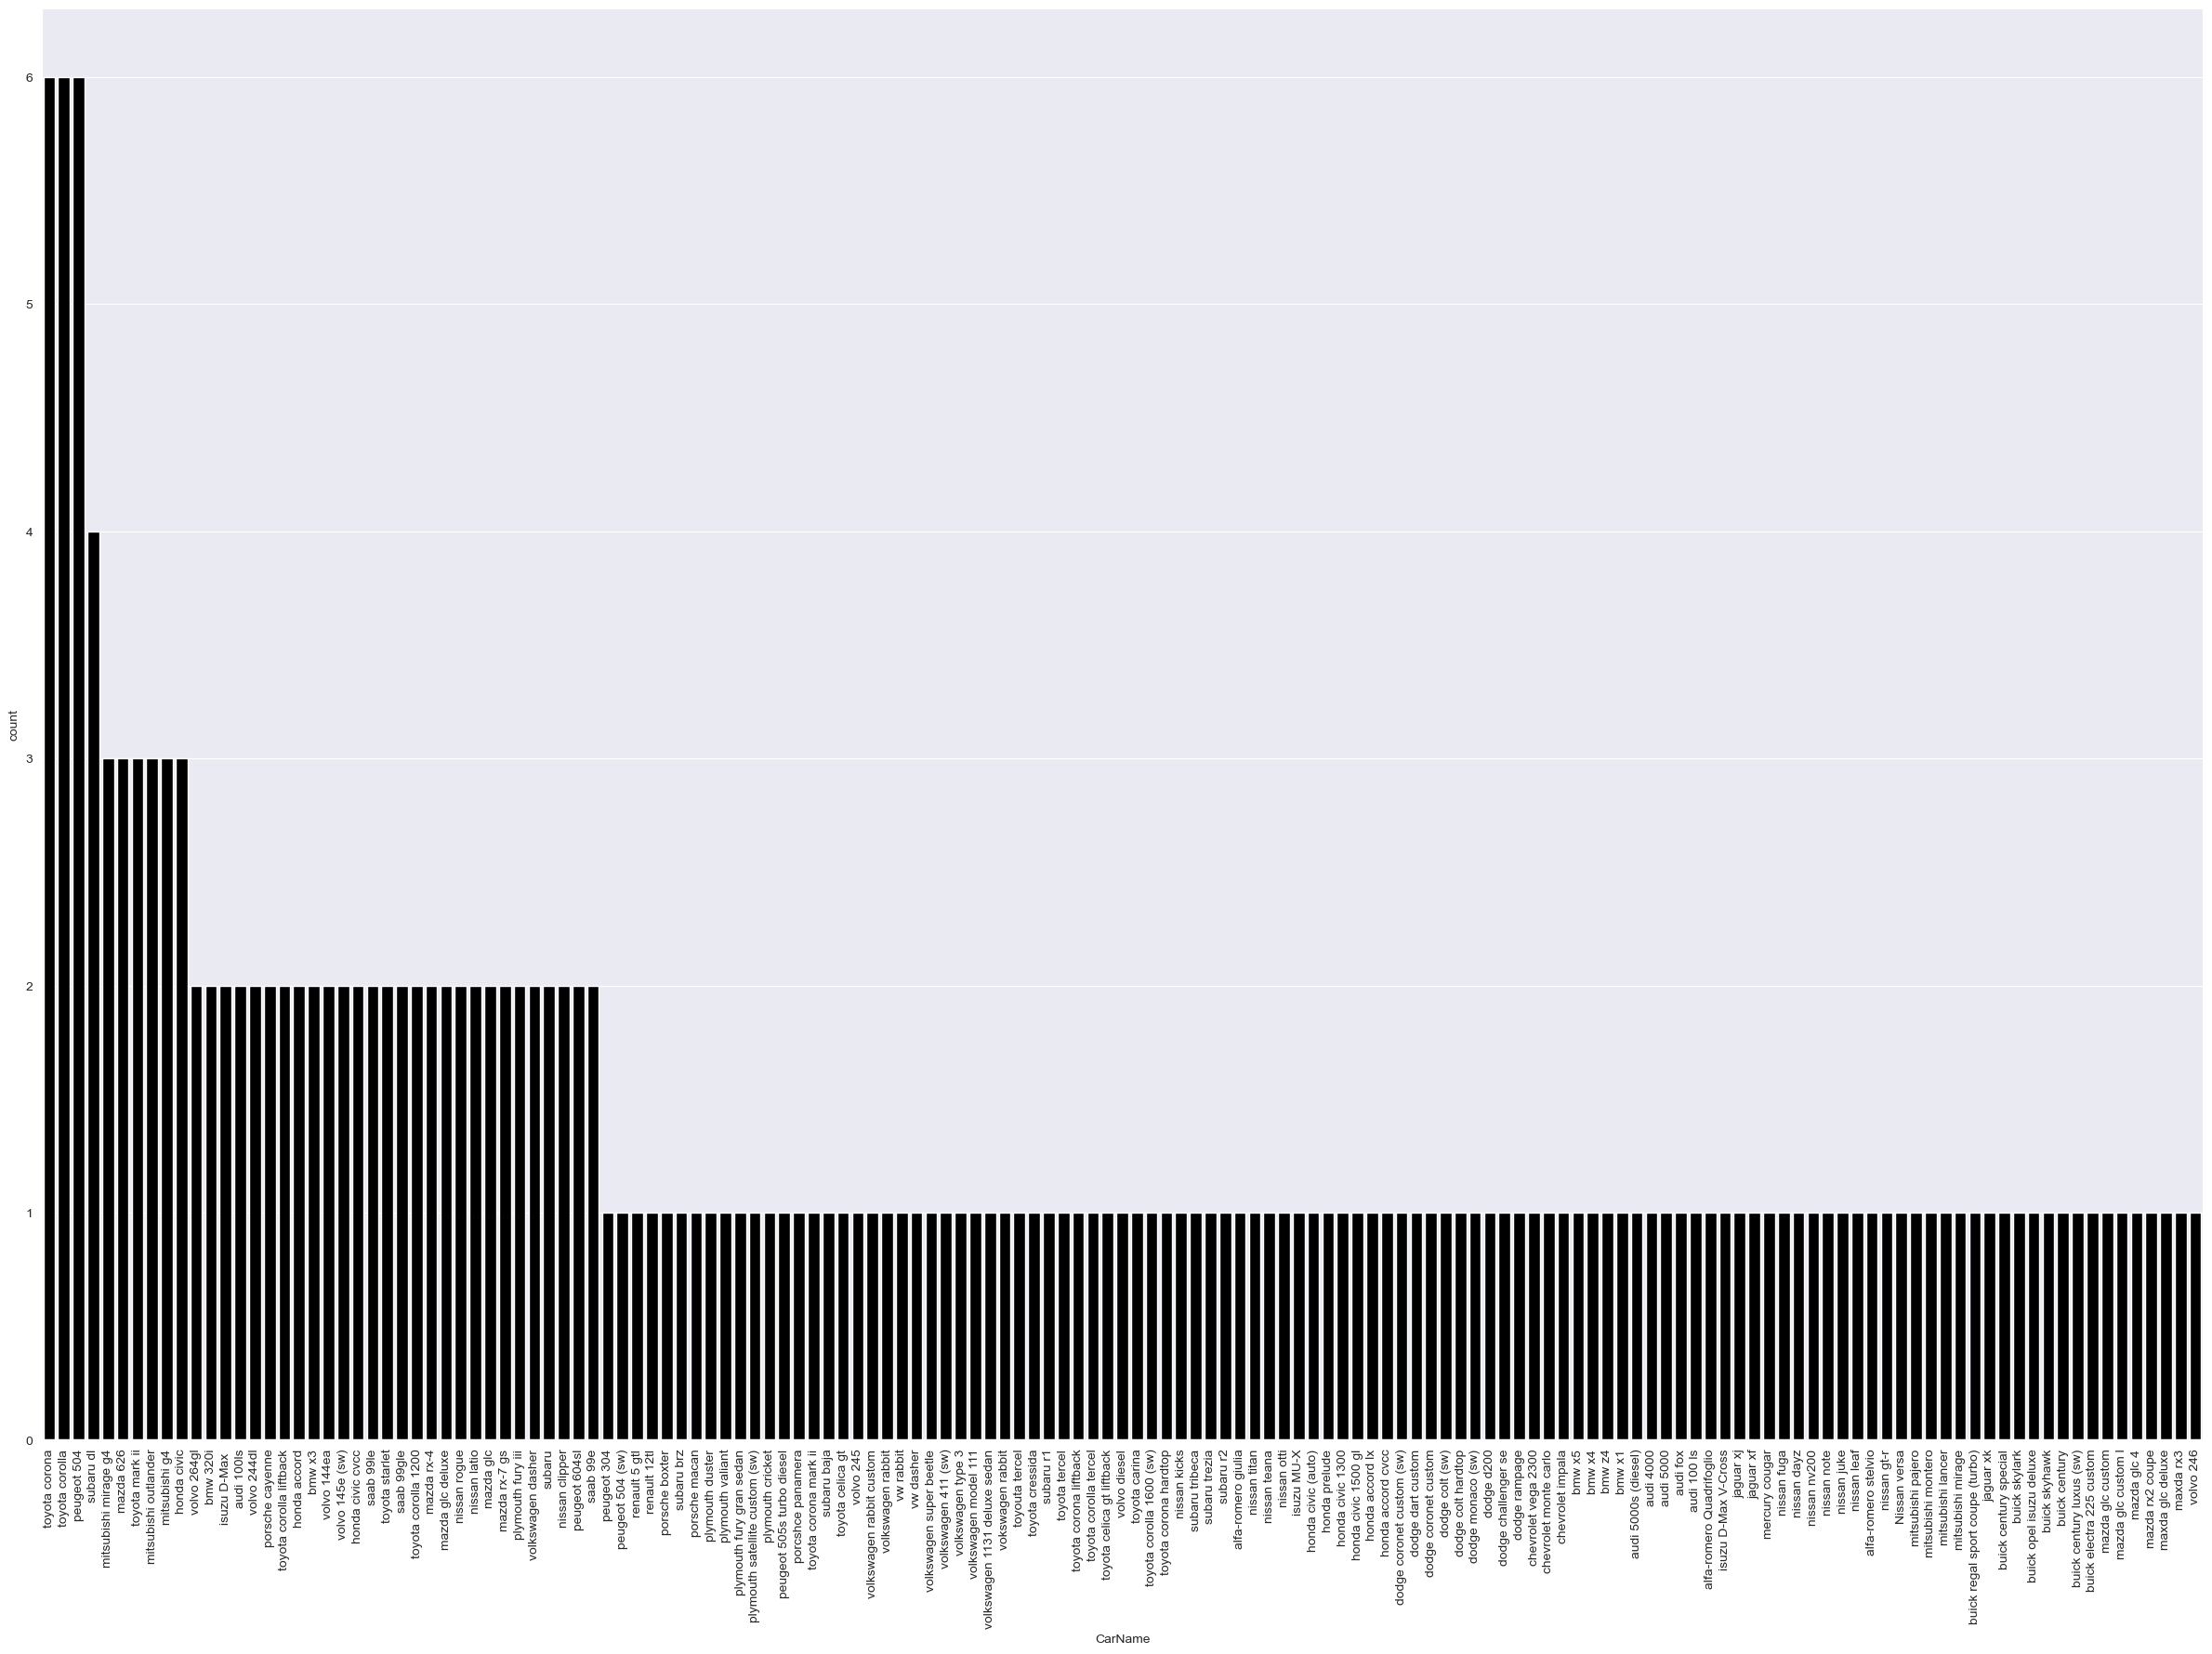

In [97]:
plt.figure(figsize = [30, 20])
sns.countplot(data=df, x="CarName", order=df["CarName"].value_counts().index,color='black')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Fuel Type Often Used')

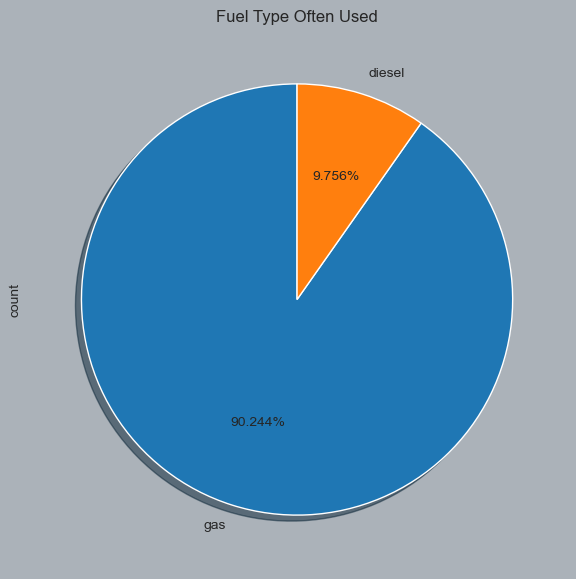

In [99]:
plt.figure(figsize=[7,7], clear=True,facecolor = "#ABB2B9")
df['fueltype'].value_counts().plot.pie(autopct='%1.3f%%',shadow =True,startangle=90)
plt.title("Fuel Type Often Used")

In [100]:
fprice=df.groupby("fueltype")["price"].mean()
fprice

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

<Axes: xlabel='fueltype'>

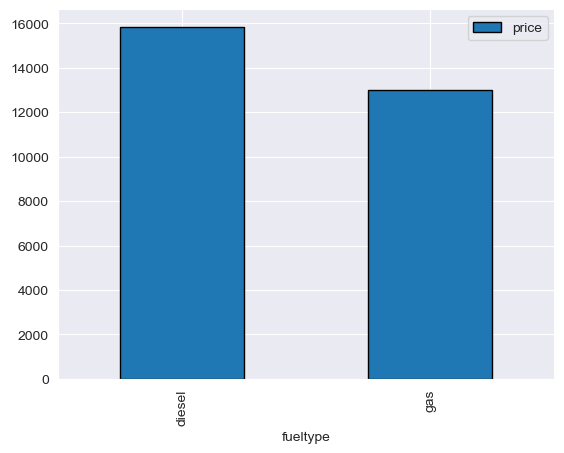

In [105]:
fprice.plot(kind="bar",edgecolor='black',grid=True,legend="True")

<Axes: ylabel='count'>

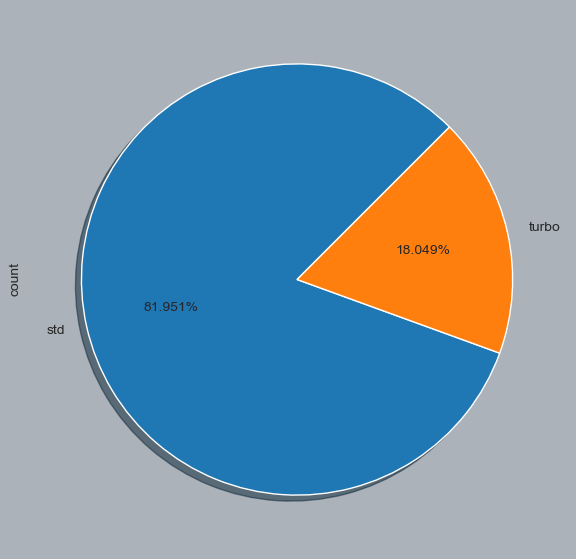

In [110]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
df["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True,startangle=45)

In [112]:
sp=df.groupby("aspiration")["price"].mean()
sp

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<Axes: xlabel='aspiration'>

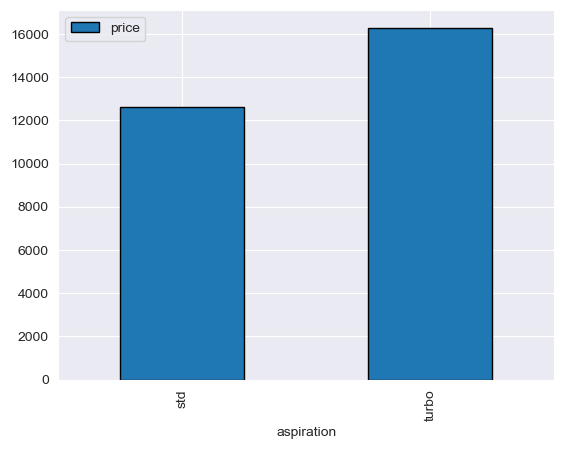

In [113]:
sp.plot(kind='bar',edgecolor='black',grid=True,legend="True")

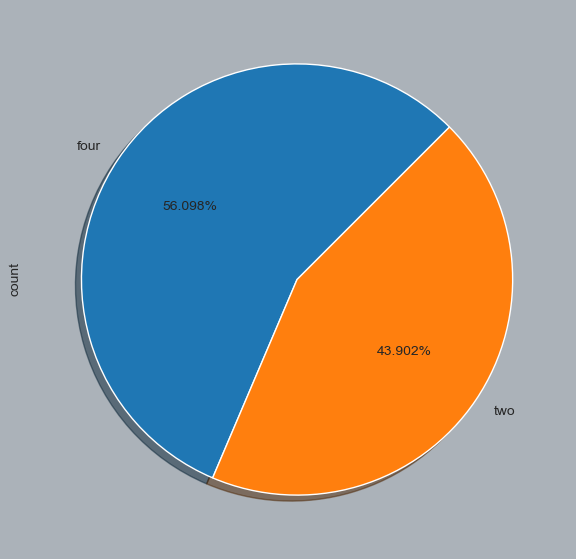

In [114]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
df["doornumber"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True,startangle=45);

In [115]:
dn=df.groupby("doornumber")["price"].mean()
dn

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

<Axes: xlabel='doornumber'>

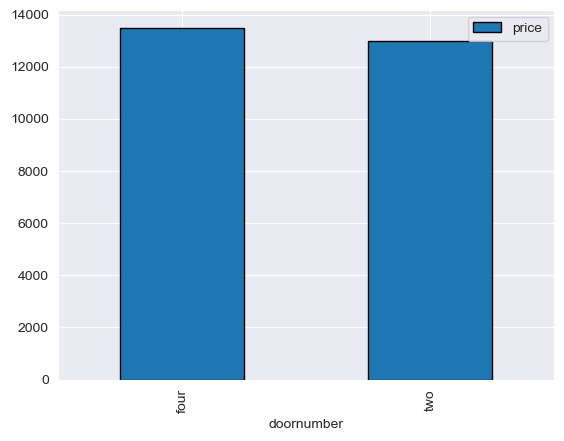

In [116]:
dn.plot(kind='bar',edgecolor='black',grid=True,legend="True")

In [120]:
dp=df.groupby('carbody')["price"].mean()
dp

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

<Axes: xlabel='carbody'>

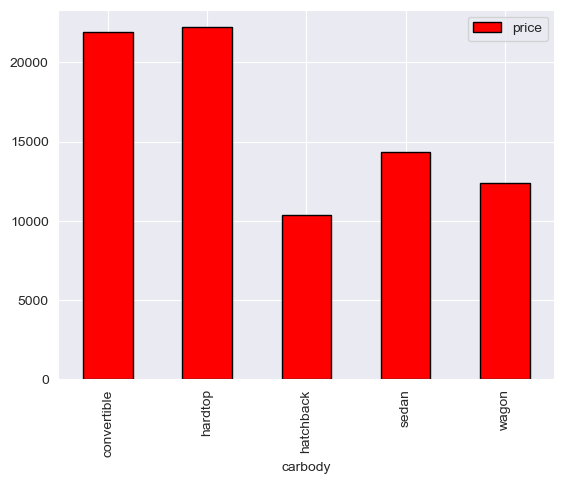

In [122]:
dp.plot(kind='bar',edgecolor='black',grid=True,legend="True",color='red')

In [123]:
et = df.groupby("enginetype")["price"].mean()
et=et.sort_values()
et

enginetype
ohc      11574.048426
rotor    13020.000000
ohcf     13738.600000
l        14627.583333
dohc     18116.416667
ohcv     25098.384615
dohcv    31400.500000
Name: price, dtype: float64

<Axes: xlabel='enginetype'>

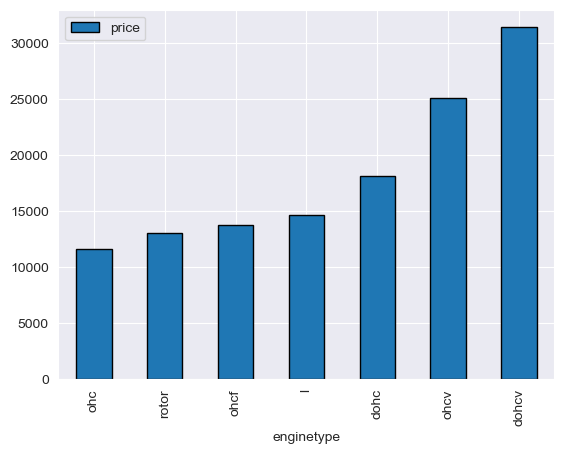

In [126]:
et.plot(kind="bar",edgecolor='black',grid=True,legend="True")

Text(0, 0.5, 'The Price')

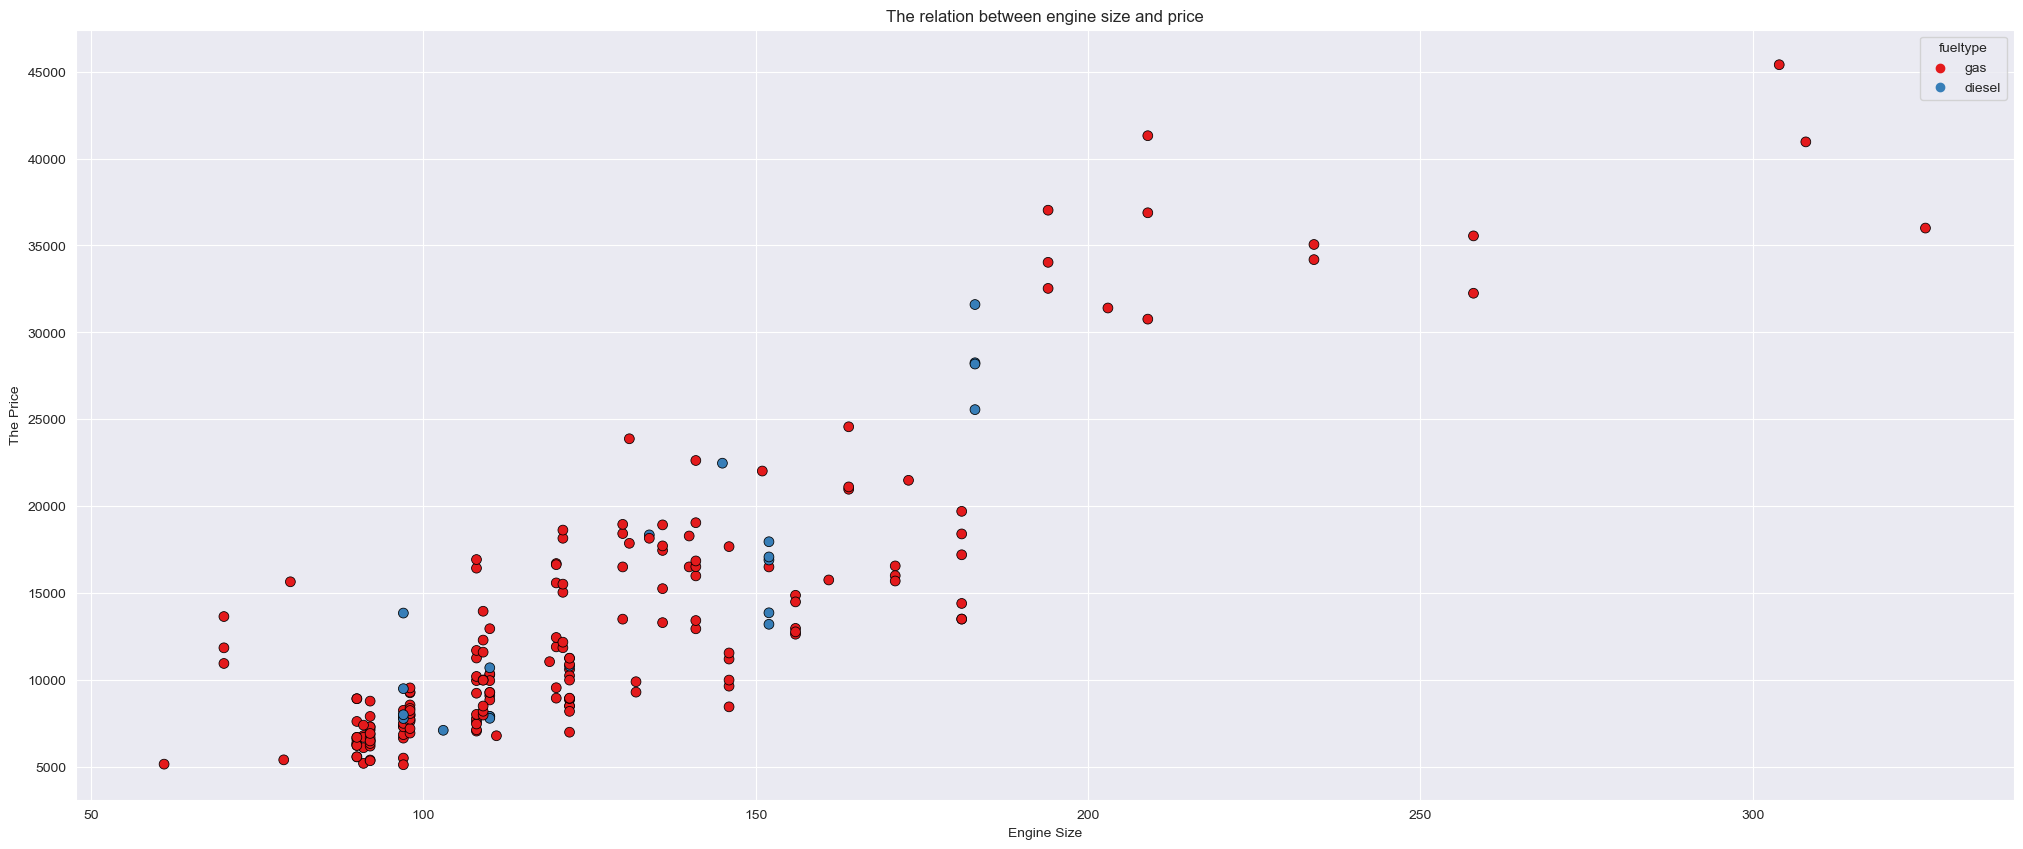

In [130]:
plt.figure(figsize=(25,10))
sns.scatterplot(data=df,x="enginesize",y="price",hue="fueltype",s=50,palette='Set1',edgecolor='black',markers=True)
plt.title("The relation between engine size and price")
plt.xlabel("Engine Size")
plt.ylabel("The Price")

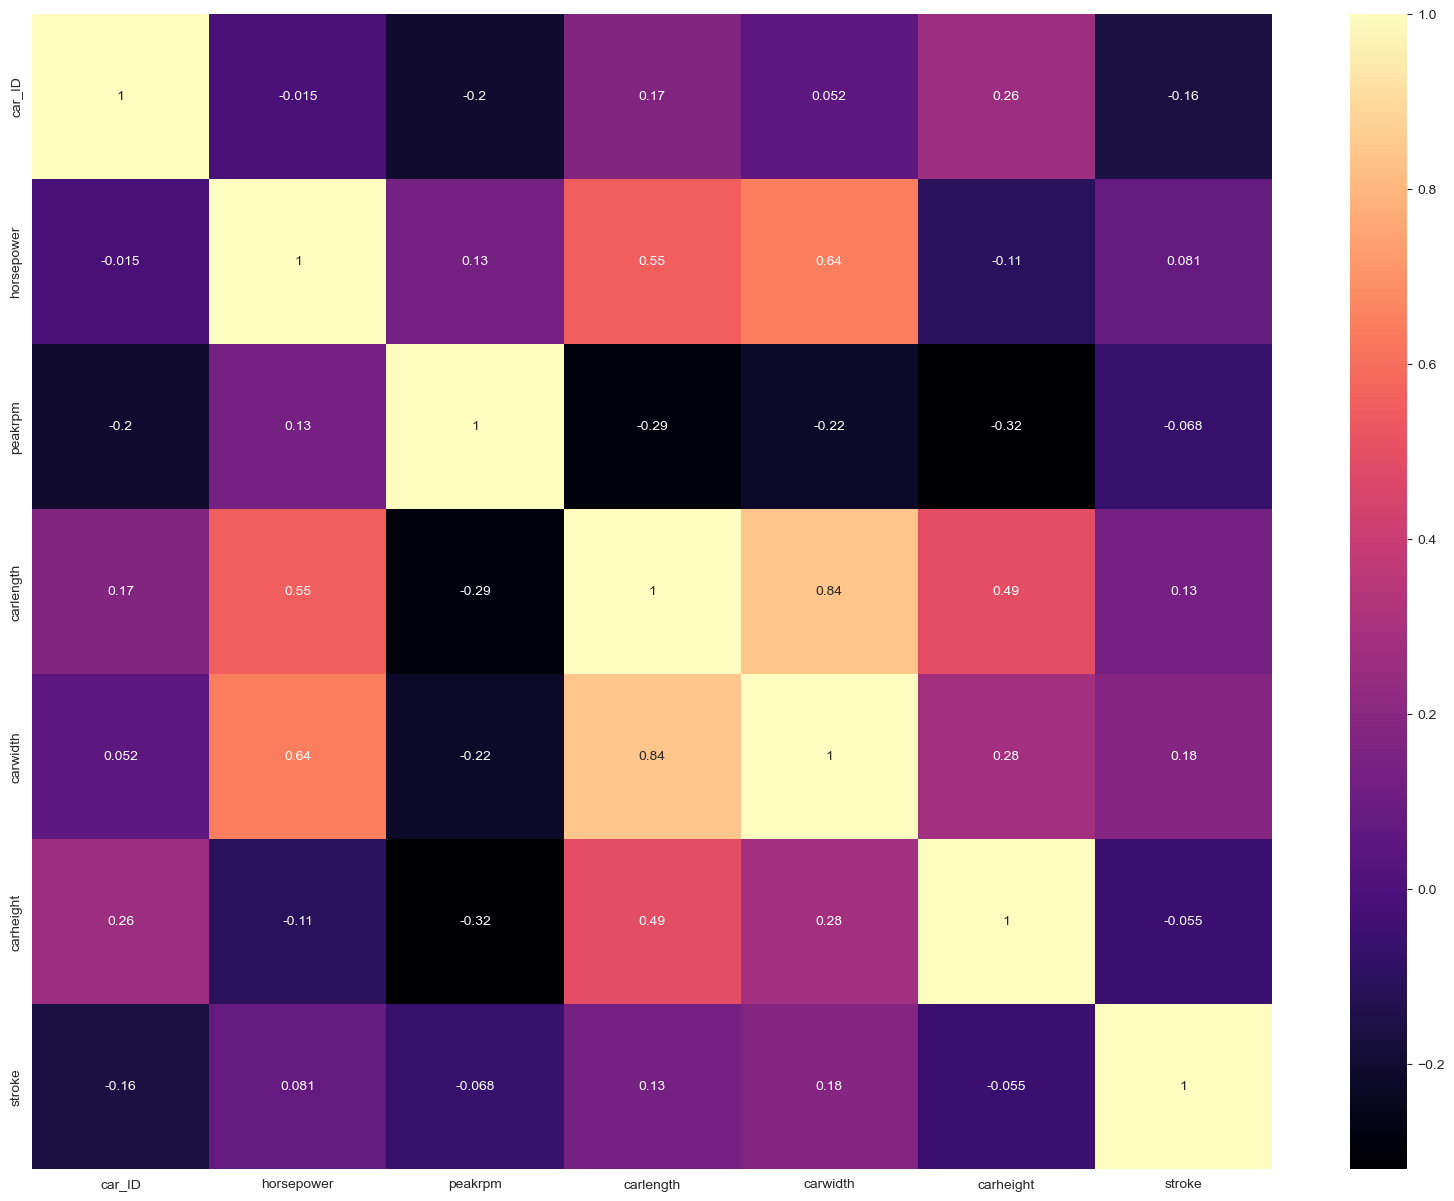

In [74]:
numeric_columns = ['car_ID', 'horsepower', 'peakrpm','carlength','carwidth','carheight','stroke']
numeric_data = car[numeric_columns]
correlations = numeric_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlations, cmap="magma", annot=True)
plt.show()

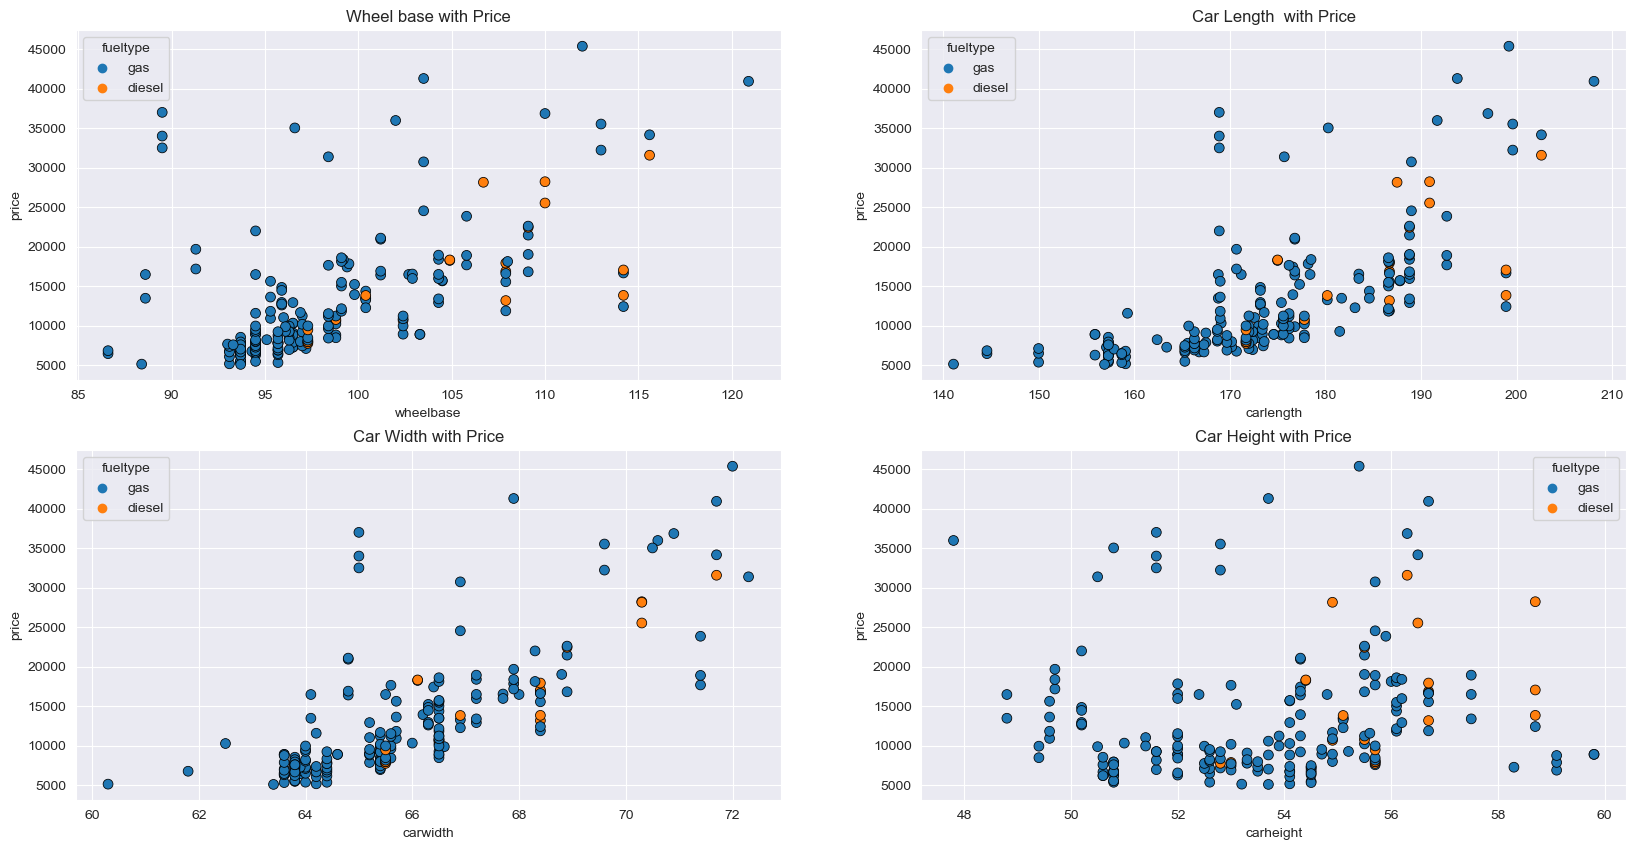

In [156]:
fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(221)
sns.scatterplot(data=df,x="wheelbase",y="price",hue="fueltype",edgecolor='black',s=50,markers=True)

ax2 = fig.add_subplot(222)
sns.scatterplot(data=df,x="carlength",y="price",hue="fueltype",s=50,edgecolor='black',markers=True)

ax3 = fig.add_subplot(223)
sns.scatterplot(data=df,x="carwidth",y="price",hue="fueltype",s=50,edgecolor='black',markers=True)
ax4 = fig.add_subplot(224)
sns.scatterplot(data=df,x="carheight",y="price",hue="fueltype",s=50,edgecolor='black',markers=True)



ax1.title.set_text('Wheel base with Price')
ax2.title.set_text('Car Length  with Price')
ax3.title.set_text('Car Width with Price')
ax4.title.set_text('Car Height with Price')
plt.show()

In [139]:
newdf=df.copy()

In [143]:
cat = []
num = []
for i in newdf.columns:
    if newdf[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

data_n=newdf[num]   
data_c=newdf[cat] 

In [144]:
col=data_c.columns
col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [145]:
label_encoders = {}
categorical_columns = data_c.columns  
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data_c[column] = label_encoders[column].fit_transform(data_c[column])

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_15468\1666741104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = label_encoders[column].fit_transform(data_c[column])
C:\Users\Tanisha\AppData\Local\Temp\ipykernel_15468\1666741104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_c[column] = label_encoders[column].fit_transform(data_c[column])
C:\Users\Tanisha\AppData\Local\Temp\ipykernel_15468\1666741104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [178]:
frames = [data_c, data_n]
  
data1 = pd.concat(frames,axis=1)
data1.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [179]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CarName           205 non-null    int32  
 1   fueltype          205 non-null    int32  
 2   aspiration        205 non-null    int32  
 3   doornumber        205 non-null    int32  
 4   carbody           205 non-null    int32  
 5   drivewheel        205 non-null    int32  
 6   enginelocation    205 non-null    int32  
 7   enginetype        205 non-null    int32  
 8   cylindernumber    205 non-null    int32  
 9   fuelsystem        205 non-null    int32  
 10  car_ID            205 non-null    int64  
 11  symboling         205 non-null    int64  
 12  wheelbase         205 non-null    float64
 13  carlength         205 non-null    float64
 14  carwidth          205 non-null    float64
 15  carheight         205 non-null    float64
 16  curbweight        205 non-null    int64  
 1

In [180]:
data1=data1[["highwaympg","citympg","CarName",'enginelocation','fuelsystem','boreratio','wheelbase','drivewheel','carlength','carwidth','horsepower','curbweight','enginesize','price']]

data1.head()

,highwaympg,citympg,CarName,enginelocation,fuelsystem,boreratio,wheelbase,drivewheel,carlength,carwidth,horsepower,curbweight,enginesize,price
0,27,21,2,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,13495.0
1,27,21,3,0,5,3.47,88.6,2,168.8,64.1,111,2548,130,16500.0
2,26,19,1,0,5,2.68,94.5,2,171.2,65.5,154,2823,152,16500.0
3,30,24,4,0,5,3.19,99.8,1,176.6,66.2,102,2337,109,13950.0
4,22,18,5,0,5,3.19,99.4,0,176.6,66.4,115,2824,136,17450.0


In [181]:
X = data1.drop(columns="price")           
y = data1["price"]    # y = price

# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (143, 13)
X Test  :  (62, 13)
Y Train :  (143,)
Y Test  :  (62,)


In [182]:
LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
MLP = MLPRegressor()
XGB = XGBRegressor()

In [183]:
li = [LR,DTR,RFR,KNR,KNR,XGB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LinearRegression() : 85.23753664175369
DecisionTreeRegressor() : 86.52876014341568
RandomForestRegressor() : 93.71565460136735
KNeighborsRegressor() : 76.12398013734366
KNeighborsRegressor() : 76.12398013734366
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 90.3448798742138


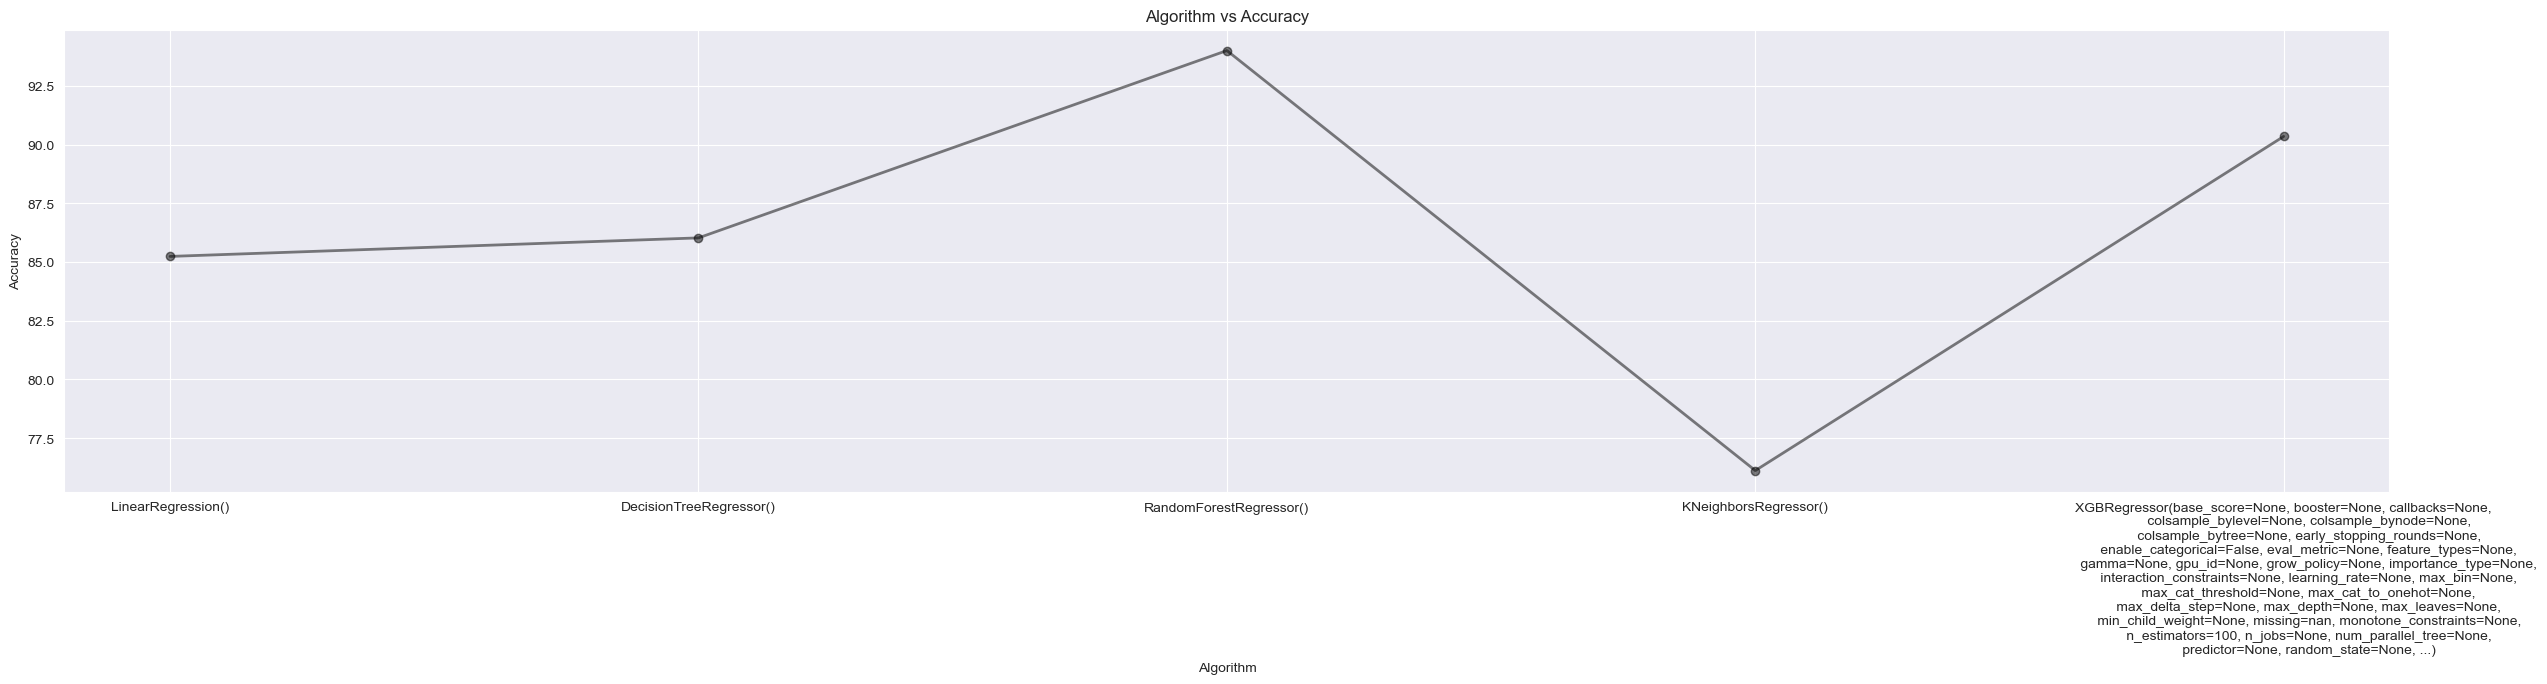

In [153]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',linewidth=2,color='black',alpha=0.5)
plt.show()